In [4]:
import warnings
warnings.filterwarnings('ignore')
from ba_code.data_processing_and_analysis.data_analyzer import DataAnalyzer, AnalyzerOption, DecomposeOption
from ba_code.data_processing_and_analysis.google_and_tripadvisor.restaurant_review_data_uri import \
    TripadvisorRestaurantReviewDataUri, GoogleRestaurantReviewDataUri, RestaurantReviewDataType
from ba_code.data_processing_and_analysis.prognolite.prognolite_restaurant_constants import \
    Restaurant

dataAnalyzer = DataAnalyzer()

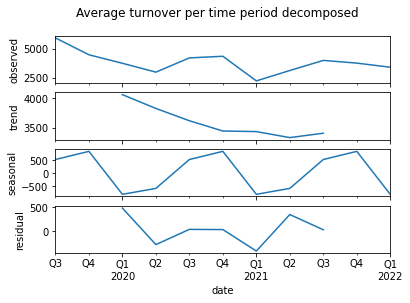

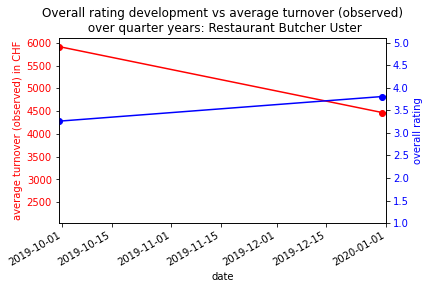

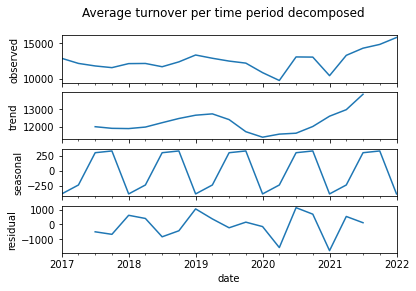

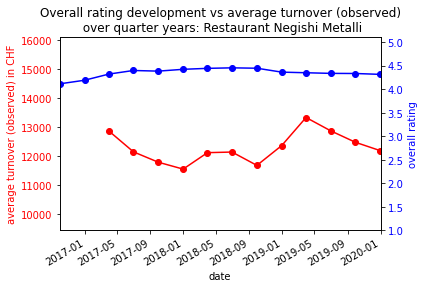

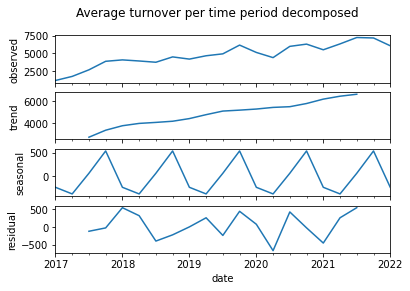

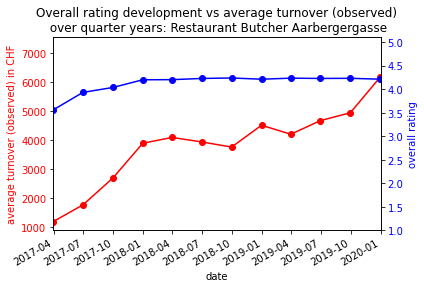

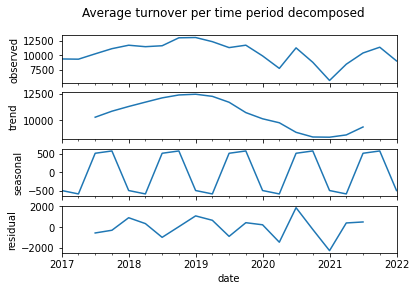

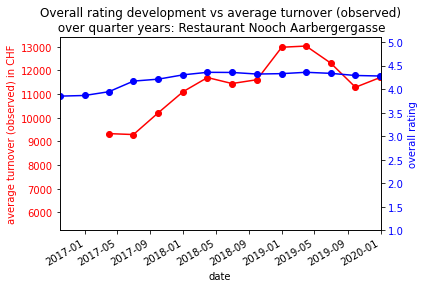

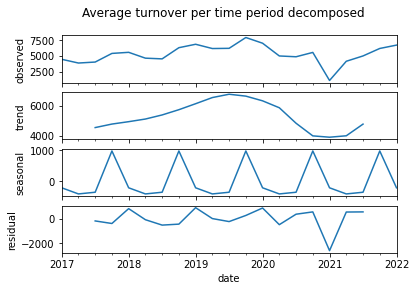

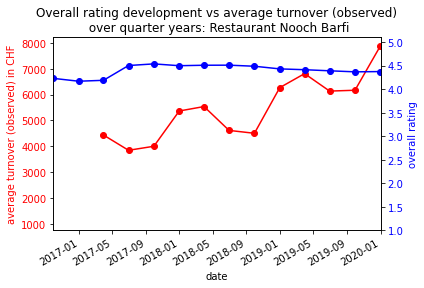

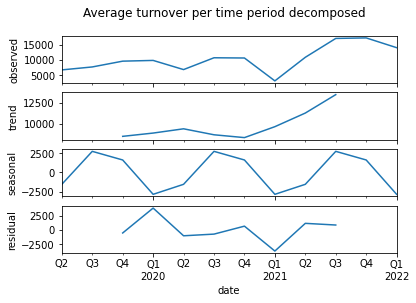

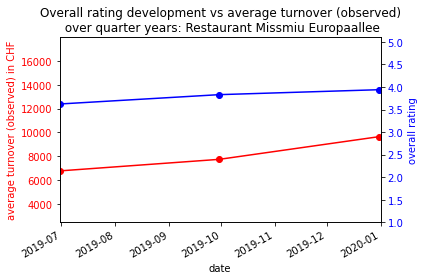

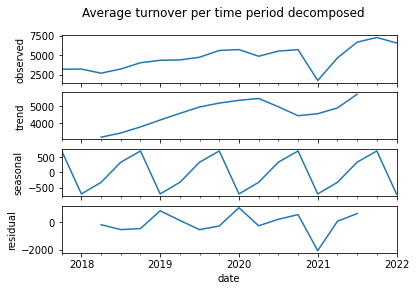

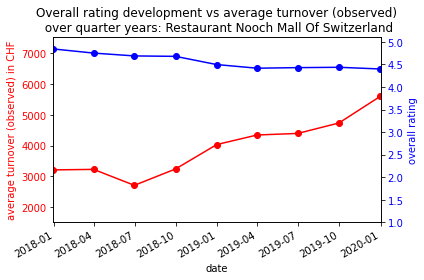

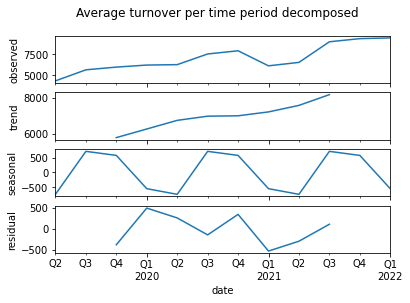

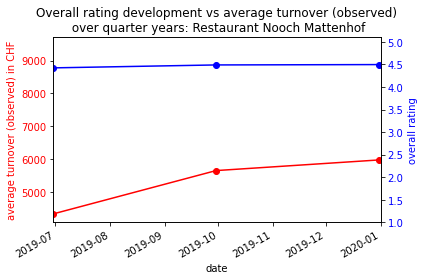

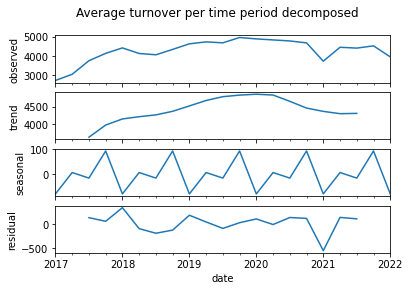

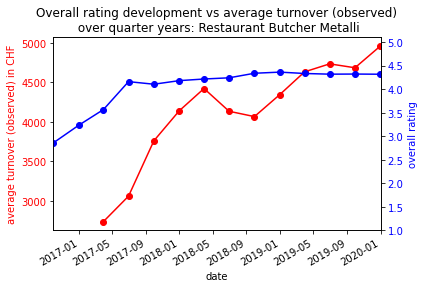

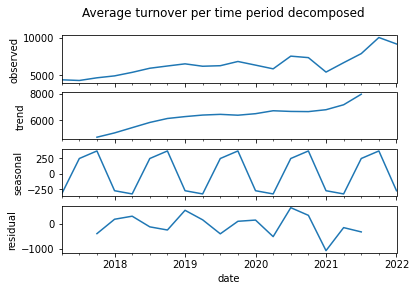

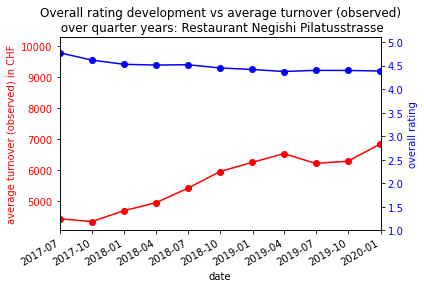

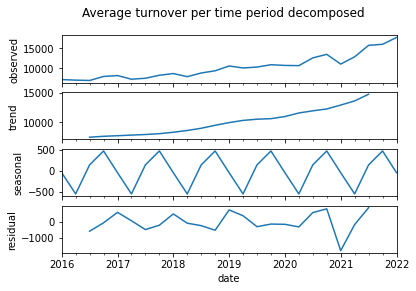

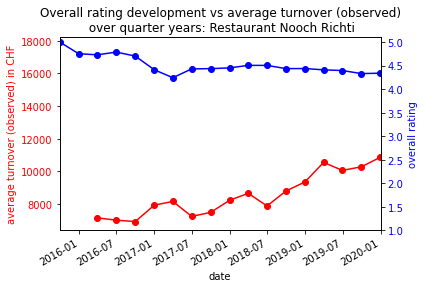

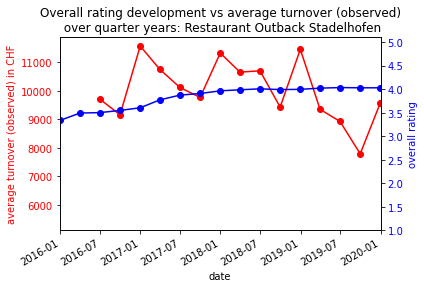

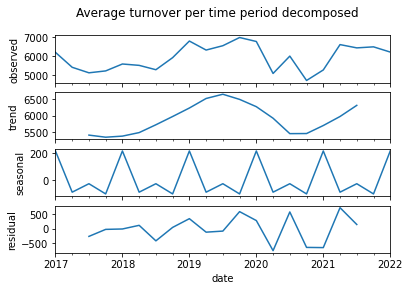

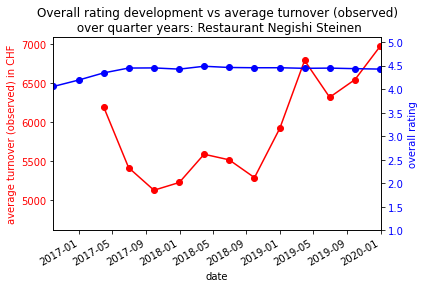

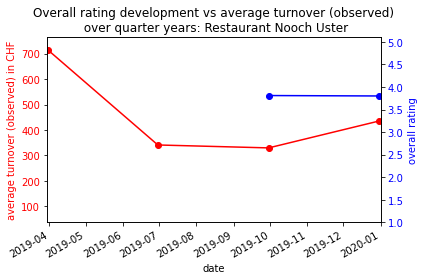

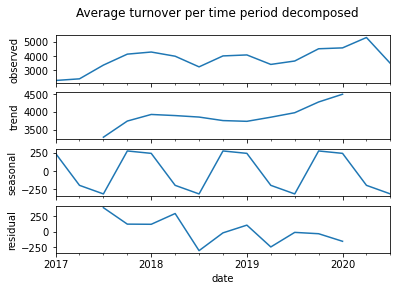

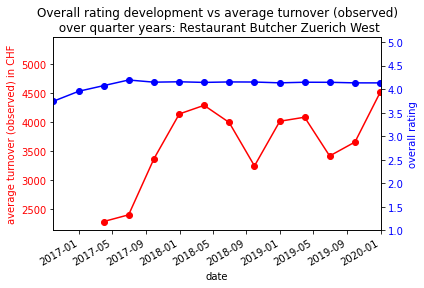

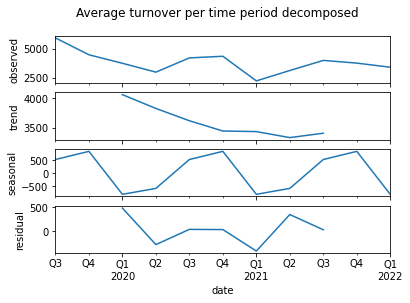

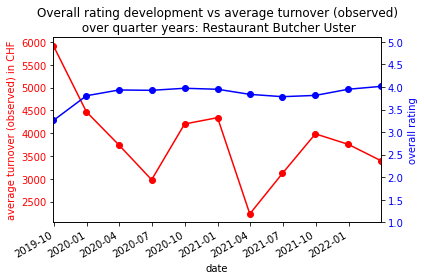

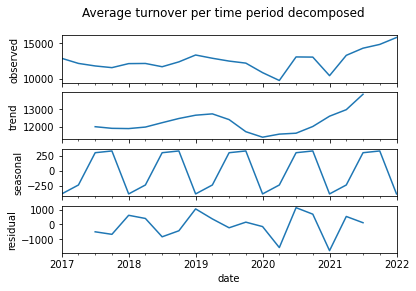

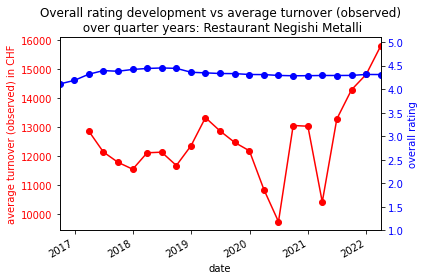

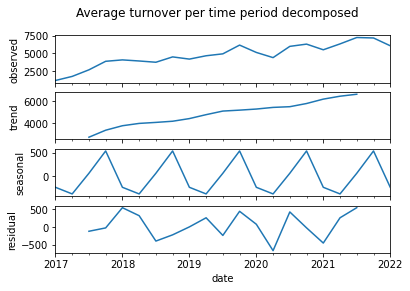

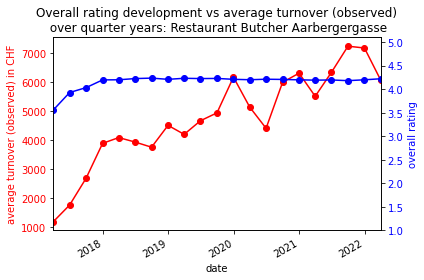

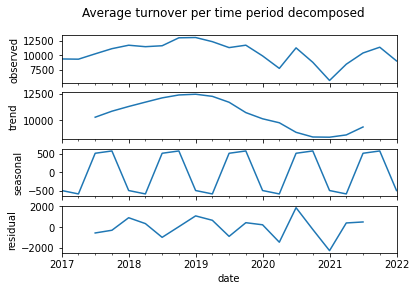

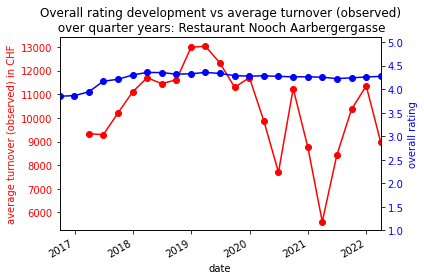

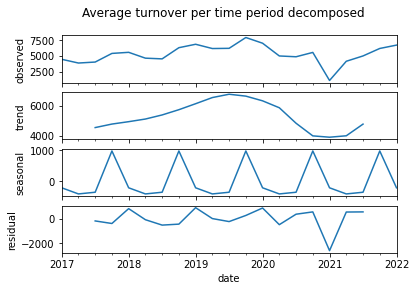

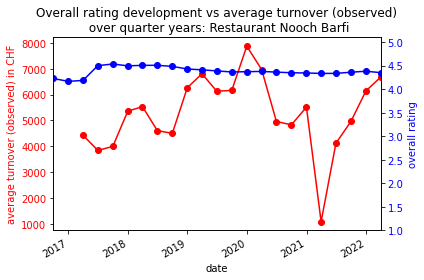

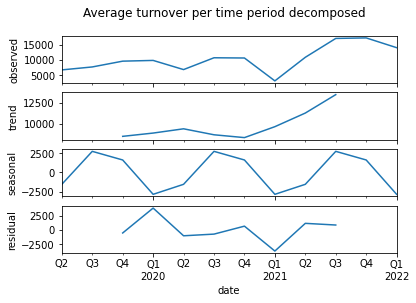

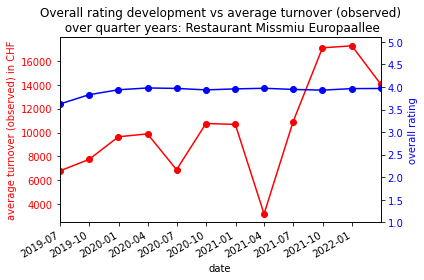

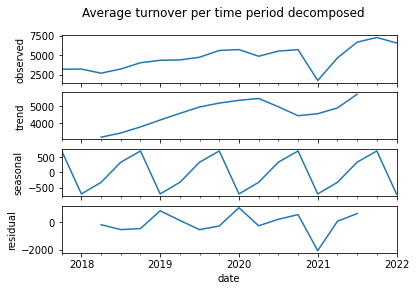

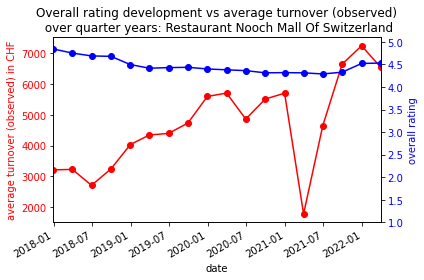

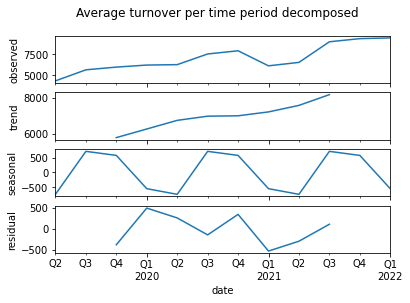

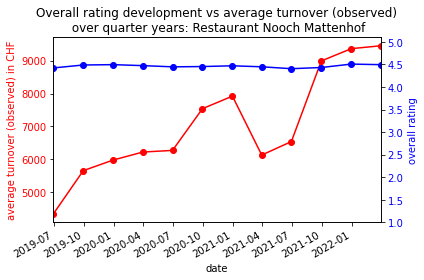

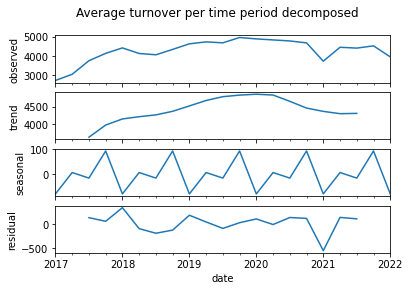

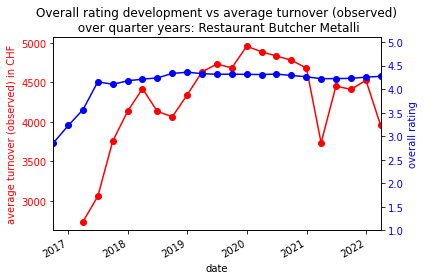

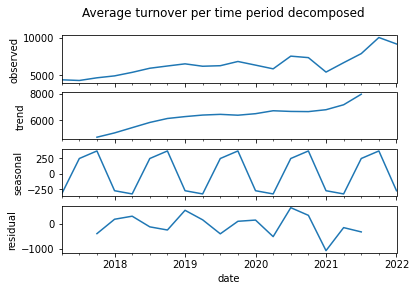

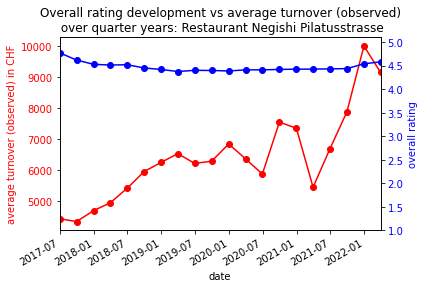

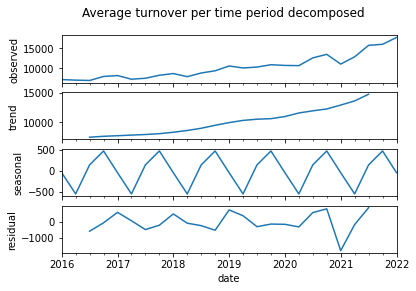

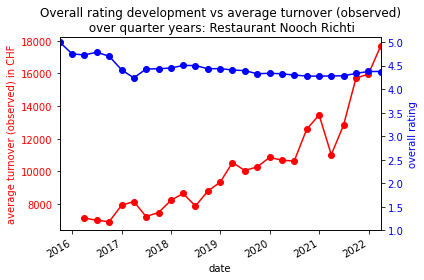

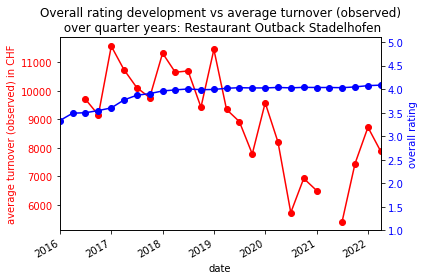

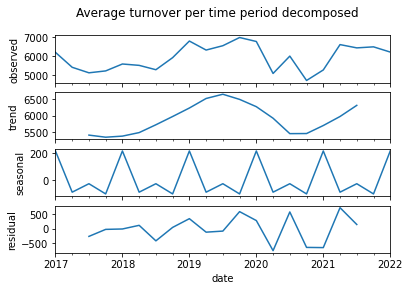

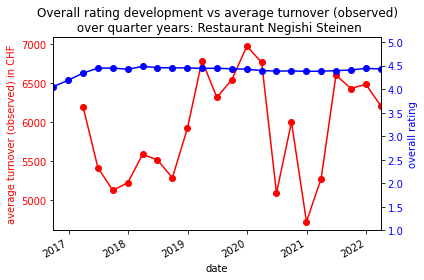

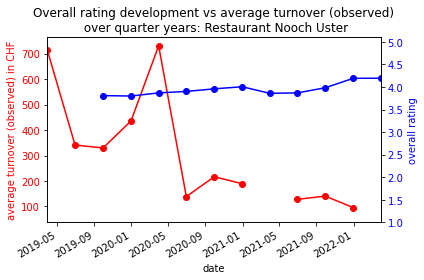

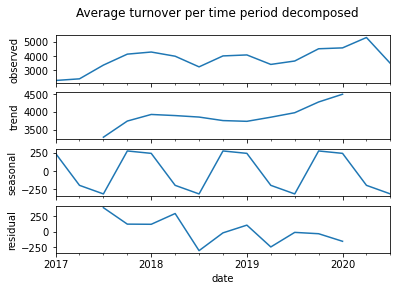

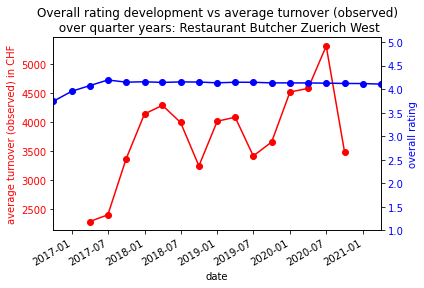

'\ndf_pearson_spearman_before_corona = dataAnalyzer.compute_correlation_for_all_restaurants(\n    analyzer_option=AnalyzerOption.OVERALL_RATING_VS_AVERAGE_TURNOVER,\n    restaurant_review_data_type=data_type,\n    time_period=time_period,\n    rating_date_offset_in_months=rating_date_offset_in_months,\n    filter_corona_data=True,\n    decompose_option=decompose_option)\n\ndf_pearson_spearman_with_corona = dataAnalyzer.compute_correlation_for_all_restaurants(\n    analyzer_option=AnalyzerOption.OVERALL_RATING_VS_AVERAGE_TURNOVER,\n    restaurant_review_data_type=data_type,\n    time_period=time_period,\n    rating_date_offset_in_months=rating_date_offset_in_months,\n    filter_corona_data=False,\n    decompose_option=decompose_option)\n'

In [5]:
data_type = RestaurantReviewDataType.GOOGLE_REVIEW
time_period = "Q"
# overall rating anfang vom monat <-> umsatzzahl ende vom monat  --> besserer vergleich da kunden zuerst rating sehen müssen
rating_date_offset_in_months = -1
decompose_option = None

# TODO: 1. get lineplots of all rest overall rating vs turnover
dataAnalyzer.plot_for_all_restaurants(
    analyzer_option=AnalyzerOption.OVERALL_RATING_VS_AVERAGE_TURNOVER,
    restaurant_review_data_type=data_type,
    time_period=time_period,
    rating_date_offset_in_months=rating_date_offset_in_months,
    filter_corona_data=True,
    decompose_option=decompose_option)

dataAnalyzer.plot_for_all_restaurants(
    analyzer_option=AnalyzerOption.OVERALL_RATING_VS_AVERAGE_TURNOVER,
    restaurant_review_data_type=data_type,
    time_period=time_period,
    rating_date_offset_in_months=rating_date_offset_in_months,
    filter_corona_data=False,
    decompose_option=decompose_option)

# TODO: look at correlations overall rating vs turnover
"""
df_pearson_spearman_before_corona = dataAnalyzer.compute_correlation_for_all_restaurants(
    analyzer_option=AnalyzerOption.OVERALL_RATING_VS_AVERAGE_TURNOVER,
    restaurant_review_data_type=data_type,
    time_period=time_period,
    rating_date_offset_in_months=rating_date_offset_in_months,
    filter_corona_data=True,
    decompose_option=decompose_option)

df_pearson_spearman_with_corona = dataAnalyzer.compute_correlation_for_all_restaurants(
    analyzer_option=AnalyzerOption.OVERALL_RATING_VS_AVERAGE_TURNOVER,
    restaurant_review_data_type=data_type,
    time_period=time_period,
    rating_date_offset_in_months=rating_date_offset_in_months,
    filter_corona_data=False,
    decompose_option=decompose_option)
"""

In [6]:
from IPython.core.display import display, HTML
import pandas as pd

#data = df_pearson_spearman #pd.DataFrame({"A":[1,2,3,4,5], "B":[10,20,30,40,50]})
for restaurant in Restaurant:
    picture_name_before_corona = DataAnalyzer.get_picture_name(restaurant, filter_corona_data=True)
    """
    df_pearson_spearman_before_corona.loc[df_pearson_spearman_before_corona["restaurant_name"] == picture_name_before_corona,'before_corona'] = \
        '<img src="{}" alt="img">'.format(picture_name_before_corona + "-corr.png")
    """
    df_pearson_spearman_before_corona.loc[df_pearson_spearman_before_corona["restaurant_name"] == picture_name_before_corona,'before_corona'] = \
    '<table><tr><td> <img src="{}" alt="img"></td></tr><tr><td> <img src="{}" alt="img"></td></tr></table>' \
    .format(
        picture_name_before_corona + "-lineplot.png",
        picture_name_before_corona + "-corr.png")

    picture_name_with_corona = DataAnalyzer.get_picture_name(restaurant, filter_corona_data=False)
    """
    df_pearson_spearman_with_corona.loc[df_pearson_spearman_with_corona["restaurant_name"] == picture_name_with_corona,'with_corona'] = \
        '<img src="{}" alt="img">'.format(picture_name_with_corona + "-corr.png")
    """
    df_pearson_spearman_with_corona.loc[df_pearson_spearman_with_corona["restaurant_name"] == picture_name_with_corona,'with_corona'] = \
    '<table><tr><td> <img src="{}" alt="img"></td></tr><tr><td> <img src="{}" alt="img"></td></tr></table>' \
    .format(
        picture_name_with_corona + "-lineplot.png",
        picture_name_with_corona + "-corr.png")
    
df_pearson_spearman_before_corona["pearson_spearman"] = \
    df_pearson_spearman_before_corona["pearson"].map('${:,.2f}'.format).astype(str) + ", " + df_pearson_spearman_before_corona["spearman"].map('${:,.2f}'.format).astype(str)
df_pearson_spearman_with_corona["pearson_spearman"] = \
    df_pearson_spearman_with_corona["pearson"].map('${:,.2f}'.format).astype(str) + ", " + df_pearson_spearman_with_corona["spearman"].map('${:,.2f}'.format).astype(str)
df = pd.DataFrame({#"restaurant_name":[restaurant.value for restaurant in Restaurant],
              "pear_s_before":df_pearson_spearman_before_corona["pearson_spearman"].to_list(),
              "before_corona":df_pearson_spearman_before_corona["before_corona"].to_list(),
              "pear_s_with":df_pearson_spearman_with_corona["pearson_spearman"].to_list(),
              "with_corona":df_pearson_spearman_with_corona["with_corona"].to_list()})

display(HTML(df.to_html(escape=False, index=False)))

NameError: name 'df_pearson_spearman_before_corona' is not defined